In [1]:
from KRZmetric import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
E,Lz,Q=getELQ(0.5,6,np.pi/4,0.5)
E,Lz,Q

(0.946987591328603, 2.2934844203095666, 5.2729725989364153)

In [3]:
#E=0.94589652471825014; Lz= 3.3004165358647404;
#E=0.94598455507288925;Lz=2.7571886342007876
#Q=3.472195
M=1e6;spin=0.5;d2=0;d3=0
d1=0.2
Q=5.155543
filenamekrz2='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK45\\RK45\\trace_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f.dat'%(M,spin,E,Lz,Q,d1,d2,d3)
#filenamekrz2='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\3D\\3D\\trace_M200000_spin0.500000_E0.946988_Lz2.293484_Q5.155543_d10.200000_d20.000000_d30.000000.dat'

In [4]:
index,krzt_sec, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(filenamekrz2,unpack=True)

In [5]:
x=r*np.sin(th)*np.cos(phi)
y=r*np.sin(th)*np.sin(phi)
z=r*np.cos(th)

In [6]:
ra=np.max(r)
rp=np.min(r)
th_max=np.max(th)
th_min=np.min(th)
pkrz=2/(1/ra+1/rp)
ekrz=(ra-rp)/(ra+rp)
iotakrz=np.pi/2-th_min
pkrz,ekrz,iotakrz

(6.8191897315625827, 0.43173473149300562, 0.77975669538489656)

In [7]:
omgkrz=freq3_sec_fromtrace(t,r,th,phi,M)
omgkrz

array([ 0.00509671,  0.00870315,  0.00920695])

[2.5927872178595213e-07]
[2.5927872178595213e-07, -7.2995682894039238e-08]
[2.5927872178595213e-07, -7.2995682894039238e-08, -1.0411870602668183e-07]
[2.5927872178595213e-07, -7.2995682894039238e-08, -1.0411870602668183e-07, 2.2195533489095809e-07]
[2.5927872178595213e-07, -7.2995682894039238e-08, -1.0411870602668183e-07, 2.2195533489095809e-07, 1.6661977842238884e-07]
[2.5927872178595213e-07, -7.2995682894039238e-08, -1.0411870602668183e-07, 2.2195533489095809e-07, 1.6661977842238884e-07, -1.6989917346263428e-08]
[2.5927872178595213e-07, -7.2995682894039238e-08, -1.0411870602668183e-07, 2.2195533489095809e-07, 1.6661977842238884e-07, -1.6989917346263428e-08, -4.2321333637226899e-08]
[2.5927872178595213e-07, -7.2995682894039238e-08, -1.0411870602668183e-07, 2.2195533489095809e-07, 1.6661977842238884e-07, -1.6989917346263428e-08, -4.2321333637226899e-08, -6.6571299682863239e-08]
[2.5927872178595213e-07, -7.2995682894039238e-08, -1.0411870602668183e-07, 2.2195533489095809e-07, 1.66619778

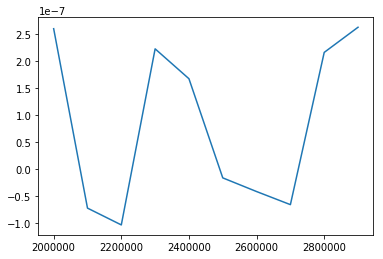

In [8]:
#试一下不同长度对orbital frequency的影响？
err=[]
for tend in np.arange(2e6,3e6,1e5):
    ts=0
    #tend=2900000
    indkrz=[]
    indkerr=[]
    for i in np.arange(len(krzt_sec)):
        if krzt_sec[i]>ts and krzt_sec[i]<tend:
            indkrz.append(i)

    omgtest=freq3_sec_fromtrace(t[indkrz],r[indkrz],th[indkrz],phi[indkrz],M)
    err.append(omgtest[1]-omgkrz[1])  
    print(err)
plt.plot(np.arange(2e6,3e6,1e5),err)

In [9]:

def myfunc_test(x):
    M=x[0]
    spin=x[1]
    p=x[2]
    #iota=0
    thisvalue=freq3_sec(ekrz,p,iotakrz,spin,M)
    #print(thisvalue)

    print('current: %f,%f,%f, target: %f,%f,%f'%(thisvalue[0],thisvalue[1],thisvalue[2],omgkrz[0],omgkrz[1],omgkrz[2]))
    return np.array(thisvalue)-omgkrz

[myM,myspin,myp],dic,ier,msg=fsolve(myfunc_test,[M,spin,pkrz],full_output=1)

current: 0.004813,0.008968,0.009485, target: 0.005097,0.008703,0.009207
current: 0.004813,0.008968,0.009485, target: 0.005097,0.008703,0.009207
current: 0.004813,0.008968,0.009485, target: 0.005097,0.008703,0.009207
current: 0.004813,0.008968,0.009485, target: 0.005097,0.008703,0.009207
current: 0.004813,0.008968,0.009485, target: 0.005097,0.008703,0.009207
current: 0.004813,0.008968,0.009485, target: 0.005097,0.008703,0.009207
current: 0.005078,0.008760,0.009267, target: 0.005097,0.008703,0.009207
current: 0.005092,0.008711,0.009215, target: 0.005097,0.008703,0.009207
current: 0.005097,0.008703,0.009207, target: 0.005097,0.008703,0.009207
current: 0.005097,0.008703,0.009207, target: 0.005097,0.008703,0.009207
current: 0.005097,0.008703,0.009207, target: 0.005097,0.008703,0.009207
current: 0.005097,0.008703,0.009207, target: 0.005097,0.008703,0.009207
current: 0.005097,0.008703,0.009207, target: 0.005097,0.008703,0.009207


In [10]:
myM,myspin,myp,dic,ier,msg

(937173.17604899604,
 0.55307629912254186,
 7.1717260434110983,
 {'fjac': array([[-0.31581708, -0.65220767, -0.68911881],
         [ 0.9283511 , -0.36245237, -0.08241672],
         [ 0.19601993,  0.66577281, -0.71994636]]),
  'fvec': array([ -2.50605873e-12,   2.44505458e-12,   2.06088965e-12]),
  'nfev': 11,
  'qtf': array([ -2.31517259e-11,  -3.71119822e-11,  -4.13087173e-12]),
  'r': array([  1.47803571e-08,   1.81843091e-03,   2.88257686e-03,
           3.00962266e-03,   4.83795112e-04,   1.98966344e-04])},
 1,
 'The solution converged.')

In [11]:


Ek,Lzk,Qk=getELQ(ekrz,myp,iotakrz,myspin)
Ek,Lzk,Qk

(0.94966582516319764, 2.3523843184517665, 5.4250748008872609)

In [18]:
myp/(1-ekrz)

12.62038424810547

In [19]:
#filenamekerr='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\3D\\3D\\trace_M187584_spin0.554285_E0.949636_Lz2.351645_Q5.421746_d10.000000_d20.000000_d30.000000.dat'
filenamekerr='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK45\\RK45\\trace_M%.0f_spin%.6f_E%.6f_Lz%.6f_Q%.6f_d1%.6f_d2%.6f_d3%.6f.dat'%(myM,myspin,Ek,Lzk,Qk,0,0,0)

In [20]:
index, tkerr_sec,tauk,tk,rk,thk,phik,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(filenamekerr,unpack=True)

In [21]:

kerrwave=getwave(filenamekerr,np.pi/4,0,M=myM)

In [15]:
krzwave=getwave(filenamekrz2,np.pi/4,0,M=M)

D:\ProgramFiles\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


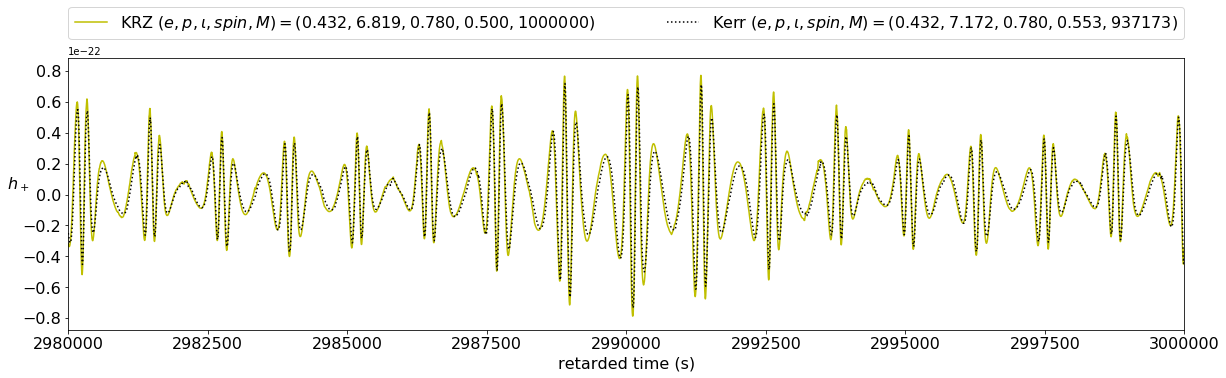

In [44]:
plt.figure(figsize=[20,5])
plt.plot(krzwave[0][1:-1],krzwave[1][1:-1],'y',label='KRZ $(e,p,\iota,spin,M)=(%.3f, %.3f, %.3f, %.3f, %d)$'%(ekrz,pkrz,iotakrz,spin,M))
plt.plot(kerrwave[0][1:-1],kerrwave[1][1:-1],'k:',label='Kerr $(e,p,\iota,spin,M)=(%.3f, %.3f, %.3f, %.3f, %d)$'%(ekrz,myp,iotakrz,myspin,myM) )
plt.xlim(2980000,3000000)
plt.legend(fontsize=16,bbox_to_anchor=(0., 1.08, 1., .108),
           ncol=2, mode="expand", borderaxespad=0.)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('retarded time (s)',fontsize=16)
plt.ylabel('$h_+$',fontsize=16,rotation=0)
plt.savefig('wave_e%.3f_p%.3f_iota%.3f_a%.3f_d1%.3f.pdf'%(ekrz,pkrz,iotakrz,spin,d1))

In [24]:
xk=rk*np.sin(thk)*np.cos(phik)
yk=rk*np.sin(thk)*np.sin(phik)
zk=rk*np.cos(thk)

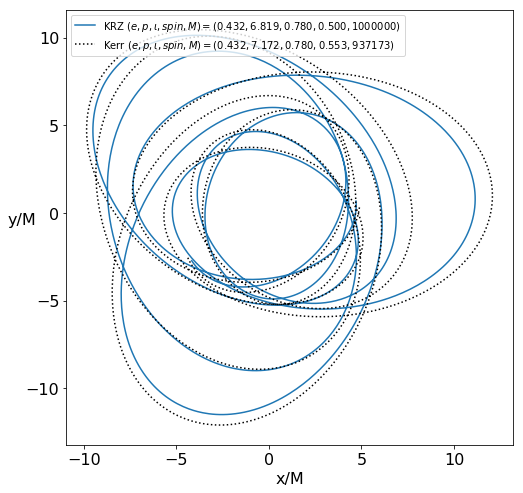

In [43]:
ts=2995000
tend=3000000
indkrz=[]
indkerr=[]
for i in np.arange(len(krzt_sec)):
    if krzt_sec[i]>ts and krzt_sec[i]<tend:
        indkrz.append(i)
for i in np.arange(len(tkerr_sec)):
    if tkerr_sec[i]>ts and tkerr_sec[i]<tend:
        indkerr.append(i)
plt.figure(figsize=[8,8])
plt.plot(x[indkrz],y[indkrz],label='KRZ $(e,p,\iota,spin,M)=(%.3f, %.3f, %.3f, %.3f, %d)$'%(ekrz,pkrz,iotakrz,spin,M))
plt.plot(xk[indkerr],yk[indkerr],':k',label='Kerr $(e,p,\iota,spin,M)=(%.3f, %.3f, %.3f, %.3f, %d)$'%(ekrz,myp,iotakrz,myspin,myM))
plt.legend(loc='upper left')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('x/M',fontsize=16)
plt.ylabel('y/M',fontsize=16,rotation=0)
plt.savefig('tracexy_e%.3f_p%.3f_iota%.3f_a%.3f_d1%.3f.pdf'%(ekrz,pkrz,iotakrz,spin,d1))

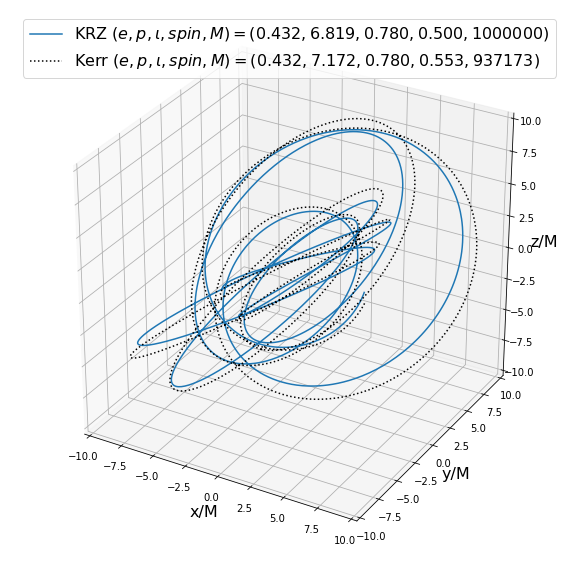

In [45]:
fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.gca(projection='3d')
myx=[]
myy=[]
myz=[]
#ax.axis([-10,10,-10,10])
#ax.set_xticks(np.linspace(-10,10,10))
#ax.set_yticks(np.linspace(-10,10,10))
#ax.set_zticks(np.linspace(-10,10,10))
#for i in np.arange(index.size):
    #myx.append(x[i])
    #myy.append(y[i])
    #myz.append(z[i])
ax.plot(x[indkrz],y[indkrz],z[indkrz],label='KRZ $(e,p,\iota,spin,M)=(%.3f, %.3f, %.3f, %.3f, %d)$'%(ekrz,pkrz,iotakrz,spin,M))
ax.plot(xk[indkerr],yk[indkerr],zk[indkerr],':k',label='Kerr $(e,p,\iota,spin,M)=(%.3f, %.3f, %.3f, %.3f, %d)$'%(ekrz,myp,iotakrz,myspin,myM))
ax.legend(loc='upper center',fontsize=16)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)


ax.set_xlabel('x/M',fontsize=16)
ax.set_ylabel('y/M',fontsize=16)
ax.set_zlabel('z/M',fontsize=16)
#ax.plot(x2,y2,z2,'y--')
plt.savefig('trace3d_e%.3f_p%.3f_iota%.3f_a%.3f_d1%.3f.pdf'%(ekrz,pkrz,iotakrz,spin,d1))

In [21]:
1/(iotakrz/np.pi)

4.028939632302956

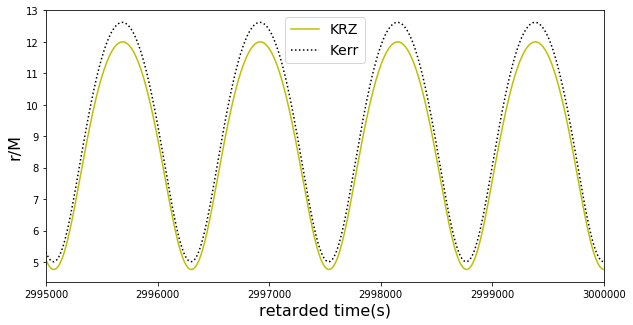

In [46]:

plt.figure(figsize=[10,5])
plt.plot(krzt_sec,r,'y',label='KRZ')
plt.plot(tkerr_sec,rk,'k:',label='Kerr')
plt.xlabel('retarded time(s)',fontsize=16)
plt.ylabel('r/M',fontsize=16)
plt.legend(fontsize=14)
plt.xlim(ts,tend)
plt.savefig('r_e%.3f_p%.3f_iota%.3f_a%.3f_d1%.3f.pdf'%(ekrz,pkrz,iotakrz,spin,d1))

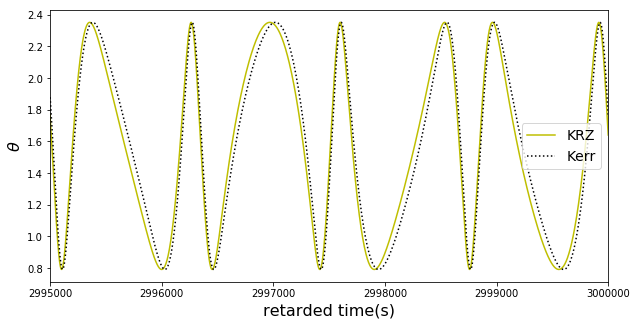

In [47]:

plt.figure(figsize=[10,5])
plt.plot(krzt_sec,th,'y',label='KRZ')
plt.plot(tkerr_sec,thk,'k:',label='Kerr')
plt.xlabel('retarded time(s)',fontsize=16)
plt.ylabel('$\\theta$',fontsize=16)
plt.legend(fontsize=14)
plt.xlim(ts,tend)
plt.savefig('th_e%.3f_p%.3f_iota%.3f_a%.3f_d1%.3f.pdf'%(ekrz,pkrz,iotakrz,spin,d1))

In [58]:
kerrwave[1][0],krzwave[1][0]

((-7.2137526386040376e+41-9.289464981256998e+41j),
 (-6.8832478425166014e+41-8.8223716713273487e+41j))

In [61]:


x=r*np.sin(th)*np.cos(phi);
y=r*np.sin(th)*np.sin(phi);
z=(r*np.cos(th));
t_tau_dot=(ut)
x_tau_dot=(ur*np.sin(th)*np.cos(phi) + r*np.cos(th)*np.cos(phi)*uth - r*np.sin(th)*np.sin(phi)*uphi )
y_tau_dot=(ur*np.sin(th)*np.sin(phi) + r*np.cos(th)*np.sin(phi)*uth + r*np.sin(th)*np.cos(phi)*uphi )
z_tau_dot=(ur*np.cos(th) - r*np.sin(th)*uth)
x_t_dot=(x_tau_dot/t_tau_dot)
y_t_dot=(y_tau_dot/t_tau_dot)
z_t_dot=(z_tau_dot/t_tau_dot)

vr_tau_dot=( (F_r*t_tau_dot-ur*F_t)/t_tau_dot/t_tau_dot )
vth_tau_dot=( (F_th*t_tau_dot-uth*F_t)/t_tau_dot/t_tau_dot )
vphi_tau_dot=( (F_phi*t_tau_dot-uphi*F_t)/t_tau_dot/t_tau_dot )

vx_tau_dot=( vr_tau_dot*np.sin(th)*np.cos(phi) + ur/ut*np.cos(th)*np.cos(phi)*uth - ur/ut*np.sin(th)*np.sin(phi)*uphi\
                  + ur*cos(th)*cos(phi)*uth/ut - r*sin(th)*cos(phi)*uth/ut*uth -r*cos(th)*sin(phi)*uth/ut*uphi +r*cos(th)*cos(phi)*vth_tau_dot  \
                  - ur*sin(th)*sin(phi)*uphi/ut - r*cos(th)*sin(phi)*uphi/ut*uth - r*sin(th)*cos(phi)*uphi/ut*uphi - r*sin(th)*sin(phi)*vphi_tau_dot)

vy_tau_dot=( vr_tau_dot*np.sin(th)*np.sin(phi) + ur/ut*np.cos(th)*np.sin(phi)*uth + ur/ut*np.sin(th)*np.cos(phi)*uphi\
                  + ur*cos(th)*sin(phi)*uth/ut - r*sin(th)*sin(phi)*uth/ut*uth +r*cos(th)*cos(phi)*uth/ut*uphi +r*cos(th)*sin(phi)*vth_tau_dot  \
                  + ur*sin(th)*cos(phi)*uphi/ut + r*cos(th)*cos(phi)*uphi/ut*uth - r*sin(th)*sin(phi)*uphi/ut*uphi + r*sin(th)*cos(phi)*vphi_tau_dot)

vz_tau_dot=( vr_tau_dot*cos(th) -ur/ut*sin(th)*uth \
                  -ur*sin(th)*uth/ut -r*cos(th)*uth/ut*uth - r*sin(th)*vth_tau_dot )

x_t_2dot=(vx_tau_dot/ut)
y_t_2dot=(vy_tau_dot/ut)
z_t_2dot=(vz_tau_dot/ut)

In [62]:
x[0],y[0],z[0]

(10.0, 0.0, -5.1034119672569625e-11)

In [63]:
x_t_dot[0],y_t_dot[0],z_t_dot[0]

(-1.0266057083457481e-12, 0.21290002066016267, -0.20116065779763795)

In [68]:
x_t_2dot[0],y_t_2dot[0],z_t_2dot[0]

(-6.6585904511786658e+61, -6.5168290470422061e+62, 6.5246458079919286e+62)

In [69]:
vx_tau_dot

array([ -7.85058391e+61,  -1.01354627e-02,  -1.01374941e-02, ...,
        -1.10666533e-02,  -1.07657667e-02,  -1.04604036e-02])

In [71]:
vth_tau_dot

array([ -7.69266105e+61,  -1.11509978e-09,  -4.73602147e-09, ...,
        -1.45797646e-04,  -1.52435764e-04,  -1.58821827e-04])

In [23]:
F_r

array([ -3.98038121e-05,  -4.37841936e-05,  -4.81626139e-05, ...,
         4.66562310e-04,   5.13240477e-04,   5.64574864e-04])

In [80]:
(kerrwave[0][1:-1],kerrwave[1][1:-1])

(array([  1.16978069e-01,   2.45653945e-01,   3.87197414e-01, ...,
          2.99999021e+06,   2.99999428e+06,   2.99999834e+06]),
 array([ -1.18218764e-23 +1.04748447e-23j,
         -1.18385637e-23 +1.04437222e-23j,
         -1.18568770e-23 +1.04094759e-23j, ...,
         -5.35946667e-24 -6.54188851e-24j,
         -4.73922621e-24 -7.43825490e-24j,  -4.10732063e-24 -8.29418098e-24j]))

In [79]:
kerrwave

(array([  0.00000000e+00,   1.16978069e-01,   2.45653945e-01, ...,
          2.99999428e+06,   2.99999834e+06,   3.00000240e+06]),
 array([ -7.21375264e+41 -9.28946498e+41j,
         -1.18218764e-23 +1.04748447e-23j,
         -1.18385637e-23 +1.04437222e-23j, ...,
         -4.73922621e-24 -7.43825490e-24j,
         -4.10732063e-24 -8.29418098e-24j,  -3.46611870e-24 -9.10783791e-24j]))

In [83]:
overlap((kerrwave[0][1:-1]-kerrwave[0][1],kerrwave[1][1:-1]),(krzwave[0][1:-1]-krzwave[0][1],krzwave[1][1:-1]))

0.99985602413299479

In [24]:
overlap(kerrwave,krzwave)

0.98966373155594956

[0, 2000.0, -2e-07, 2e-07]

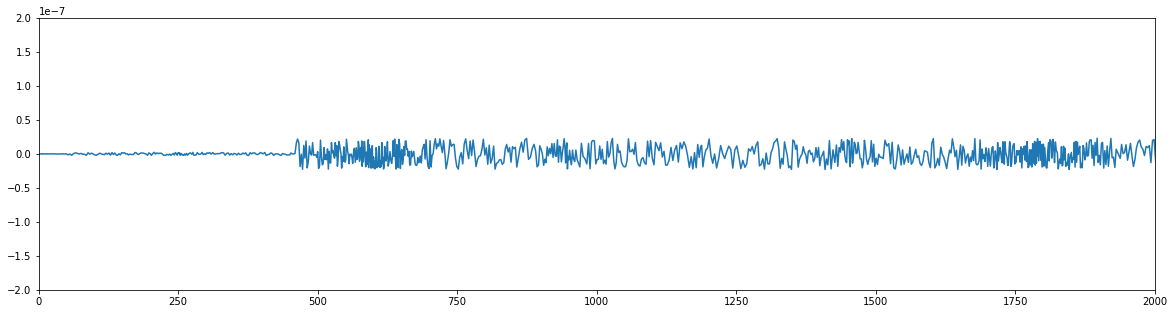

In [96]:
plt.figure(figsize=[20,5])
plt.plot(kerrwave[0],kerrwave[0]-tkerr_sec)
plt.axis([0,2e3,-2e-7,2e-7])

In [85]:
tkerr_sec

array([  0.00000000e+00,   1.16978069e-01,   2.45653945e-01, ...,
         2.99999428e+06,   2.99999834e+06,   3.00000240e+06])